In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [132]:
def reset():
    os.remove('time.csv')
    os.remove('priority.csv')
    os.remove('avg.csv')
#reset()

In [133]:
time = pd.read_csv('time.csv', header=None)
time

,0,1,2,3,4,5,6,7
0,3852,3945,3846,3958,3921,3798,3970,3860


In [134]:
avg = pd.read_csv('avg.csv', header=None)
avg

,0,1,2,3,4,5,6,7
0,7.79725,7.662935,7.931168,7.596126,10.742758,9.992466,10.867562,9.977128


In [135]:
priority = pd.read_csv('priority.csv', header=None)
priority


,0,1,2,3,4,5,6,7
0,3.441227,2.66913,5.430771,2.747908,3.10961,4.582481,2.090768,2.408363


In [136]:
priority = priority.to_numpy().flatten()
time = time.to_numpy().flatten()
avg = avg.to_numpy().flatten()

In [137]:
table = np.array([priority, time, avg]).T

In [138]:
table.T

array([[3.44122749e+00, 2.66912985e+00, 5.43077119e+00, 2.74790787e+00,
        3.10960984e+00, 4.58248112e+00, 2.09076760e+00, 2.40836334e+00],
       [3.85200000e+03, 3.94500000e+03, 3.84600000e+03, 3.95800000e+03,
        3.92100000e+03, 3.79800000e+03, 3.97000000e+03, 3.86000000e+03],
       [7.79725039e+00, 7.66293508e+00, 7.93116807e+00, 7.59612588e+00,
        1.07427577e+01, 9.99246598e+00, 1.08675615e+01, 9.97712775e+00]])

In [139]:
table.T.shape

(3, 8)

In [140]:
table = np.array([priority, time, avg]).T
pd.DataFrame(table, columns=['priority', 'time', 'avg'])

,priority,time,avg
0,3.441227,3852.0,7.797250
1,2.669130,3945.0,7.662935
2,5.430771,3846.0,7.931168
3,2.747908,3958.0,7.596126
4,3.109610,3921.0,10.742758
5,4.582481,3798.0,9.992466
6,2.090768,3970.0,10.867562
7,2.408363,3860.0,9.977128


In [141]:
sorted = pd.DataFrame(table, columns=['priority', 'time', 'avg']).sort_values(by='priority')
sorted

,priority,time,avg
6,2.090768,3970.0,10.867562
7,2.408363,3860.0,9.977128
1,2.669130,3945.0,7.662935
3,2.747908,3958.0,7.596126
4,3.109610,3921.0,10.742758
0,3.441227,3852.0,7.797250
5,4.582481,3798.0,9.992466
2,5.430771,3846.0,7.931168


In [142]:
from seaborn import kdeplot

<BarContainer object of 8 artists>

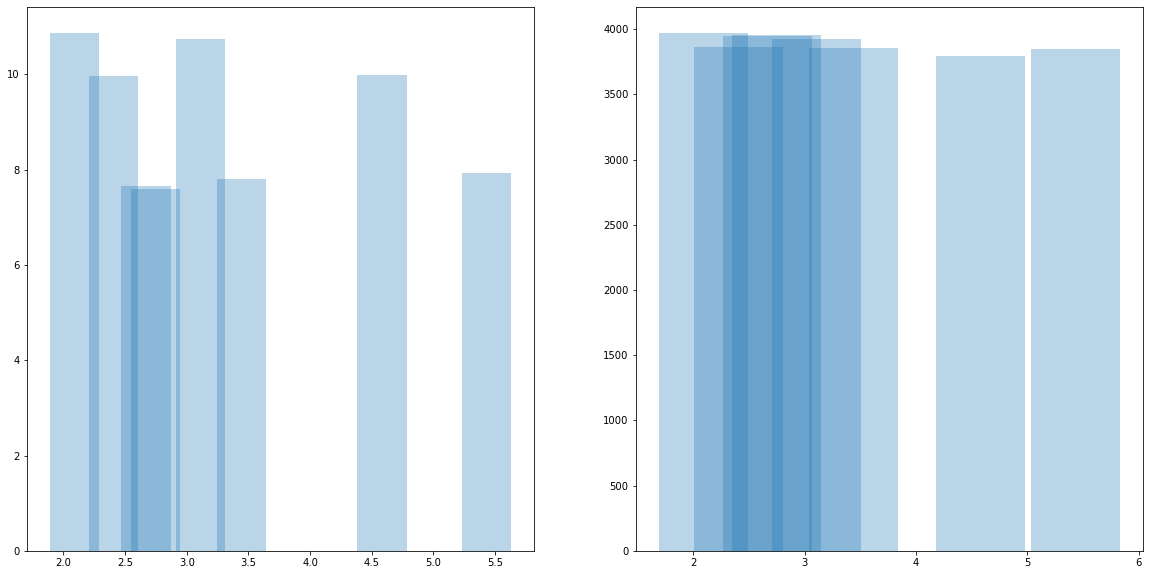

In [143]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.bar( priority, avg,width=0.4, alpha=0.3)
ax2.bar(priority, time, alpha=0.3)


In [144]:
max(sorted['time'])

3970.0

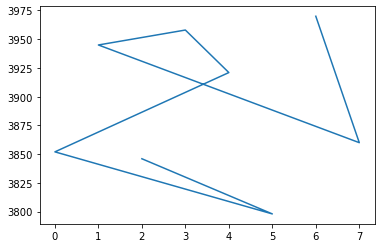

In [145]:
plt.plot(sorted['time'])

In [146]:
bins = np.histogram(sorted['priority'],4)
bins

(array([4, 2, 1, 1]),
 array([2.0907676 , 2.92576849, 3.76076939, 4.59577029, 5.43077119]))

In [147]:
classes = np.digitize(sorted['priority'], [-np.inf,1,2,4,5,np.inf])

In [148]:
np.unique(classes, return_counts=True)

(array([3, 4, 5]), array([6, 1, 1]))

In [149]:
sorted['class'] = classes
sorted

,priority,time,avg,class
6,2.090768,3970.0,10.867562,3
7,2.408363,3860.0,9.977128,3
1,2.669130,3945.0,7.662935,3
3,2.747908,3958.0,7.596126,3
4,3.109610,3921.0,10.742758,3
0,3.441227,3852.0,7.797250,3
5,4.582481,3798.0,9.992466,4
2,5.430771,3846.0,7.931168,5


In [150]:
sorted.mean()

priority       3.310032
time        3893.750000
avg            9.070924
class          3.375000
dtype: float64

In [151]:
sorted.std()

priority     1.146448
time        62.839364
avg          1.452689
class        0.744024
dtype: float64

In [152]:
mean = pd.DataFrame(sorted[sorted['class']==i].mean() for i in range(1,7))
mean

,priority,time,avg,class
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,2.744501,3917.666667,9.107293,3.0
3,4.582481,3798.000000,9.992466,4.0
4,5.430771,3846.000000,7.931168,5.0
5,NaN,NaN,NaN,NaN


In [153]:
std = pd.DataFrame(sorted[sorted['class']==i].std() for i in range(1,6))
std

,priority,time,avg,class
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,0.482655,50.519963,1.588453,0.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [154]:
classes = [1,2,3,4,5,6]

priority(all)   avg time   avg min space
</br>
3.0	  9989.375	  2.352072

In [155]:
pd.read_csv('stat_data.csv')

,Unnamed: 0,n,time w/o p,time 0,time 1,time 2,time 3,time 4,space w/o p,space 0,space 1,space 2,space 3,space 4
0,0,4.0,3416.227500,3450.000000,3435.188679,3421.589091,3416.672727,3416.100000,10.375820,10.534822,10.410884,10.380548,10.302012,10.268028
1,1,8.0,3507.492500,3676.500000,3574.575000,3529.640977,3513.669565,3501.608696,8.915071,9.493752,9.141487,8.975963,8.701778,9.204849
2,2,12.0,3579.130000,3866.514286,3732.318681,3623.220403,3569.784431,3567.954545,7.997934,8.491035,8.451266,8.308227,8.180190,8.058163
3,3,16.0,3679.287500,4791.297297,3916.637255,3713.876444,3614.504717,3602.545455,7.540923,7.566398,7.843866,7.937354,7.942837,7.978620
4,4,20.0,3797.873000,4430.052632,4070.637405,3809.259019,3660.100358,3640.114286,7.134487,7.682470,7.762671,7.628807,7.739251,8.083141
5,5,24.0,4015.601667,5152.461538,4240.135647,3896.371027,3709.717325,3678.303030,6.803383,7.522469,7.459135,7.515671,7.446154,7.949425
6,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [156]:
data = pd.read_csv('stat_data.csv')
data

,Unnamed: 0,n,time w/o p,time 0,time 1,time 2,time 3,time 4,space w/o p,space 0,space 1,space 2,space 3,space 4
0,0,4.0,3416.227500,3450.000000,3435.188679,3421.589091,3416.672727,3416.100000,10.375820,10.534822,10.410884,10.380548,10.302012,10.268028
1,1,8.0,3507.492500,3676.500000,3574.575000,3529.640977,3513.669565,3501.608696,8.915071,9.493752,9.141487,8.975963,8.701778,9.204849
2,2,12.0,3579.130000,3866.514286,3732.318681,3623.220403,3569.784431,3567.954545,7.997934,8.491035,8.451266,8.308227,8.180190,8.058163
3,3,16.0,3679.287500,4791.297297,3916.637255,3713.876444,3614.504717,3602.545455,7.540923,7.566398,7.843866,7.937354,7.942837,7.978620
4,4,20.0,3797.873000,4430.052632,4070.637405,3809.259019,3660.100358,3640.114286,7.134487,7.682470,7.762671,7.628807,7.739251,8.083141
5,5,24.0,4015.601667,5152.461538,4240.135647,3896.371027,3709.717325,3678.303030,6.803383,7.522469,7.459135,7.515671,7.446154,7.949425
6,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [157]:
from hyperparameters import delt

In [158]:
time_data = data.iloc[:,2:8]
time_data = time_data*delt

In [159]:
time_data

,time w/o p,time 0,time 1,time 2,time 3,time 4
0,34.162275,34.500000,34.351887,34.215891,34.166727,34.161000
1,35.074925,36.765000,35.745750,35.296410,35.136696,35.016087
2,35.791300,38.665143,37.323187,36.232204,35.697844,35.679545
3,36.792875,47.912973,39.166373,37.138764,36.145047,36.025455
4,37.978730,44.300526,40.706374,38.092590,36.601004,36.401143
5,40.156017,51.524615,42.401356,38.963710,37.097173,36.783030
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [160]:
time_percent = time_data.copy()
for i in range(5):
    time_percent[f'time {i}'] = (time_percent[f'time {i}'] - time_percent['time w/o p'])*100/time_percent['time w/o p']
time_percent

,time w/o p,time 0,time 1,time 2,time 3,time 4
0,34.162275,0.988590,0.555033,0.156945,0.013033,-0.003732
1,35.074925,4.818471,1.912549,0.631462,0.176111,-0.167750
2,35.791300,8.029445,4.280054,1.231875,-0.261113,-0.312239
3,36.792875,30.223509,6.450971,0.940099,-1.760743,-2.085786
4,37.978730,16.645623,7.182031,0.299800,-3.627626,-4.153870
5,40.156017,28.311072,5.591540,-2.969185,-7.617398,-8.399704
6,0.000000,NaN,NaN,NaN,NaN,NaN


In [161]:
space_data = data.iloc[:,8:]
#space_data['n'] = data['n']
space_data

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.375820,10.534822,10.410884,10.380548,10.302012,10.268028
1,8.915071,9.493752,9.141487,8.975963,8.701778,9.204849
2,7.997934,8.491035,8.451266,8.308227,8.180190,8.058163
3,7.540923,7.566398,7.843866,7.937354,7.942837,7.978620
4,7.134487,7.682470,7.762671,7.628807,7.739251,8.083141
5,6.803383,7.522469,7.459135,7.515671,7.446154,7.949425
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [162]:
space_percent = space_data.copy()
for i in range(5):
    space_percent[f'space {i}'] = (space_percent[f'space {i}'] - space_percent['space w/o p'])*100/space_percent['space w/o p']
space_percent

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.375820,1.532429,0.337939,0.045570,-0.711346,-1.038872
1,8.915071,6.491033,2.539699,0.683017,-2.392503,3.250425
2,7.997934,6.165354,5.668106,3.879661,2.278786,0.753059
3,7.540923,0.337821,4.017315,5.257058,5.329776,5.804284
4,7.134487,7.680758,8.804892,6.928599,8.476630,13.296741
5,6.803383,10.569525,9.638615,10.469606,9.447802,16.845178
6,0.000000,NaN,NaN,NaN,NaN,NaN


In [163]:
# for i in range(5):
#     space_data[f'space {i}'] = (space_data[f'space {i}'] - space_data['space w/o p'])*100/space_data['space w/o p']

# space_data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


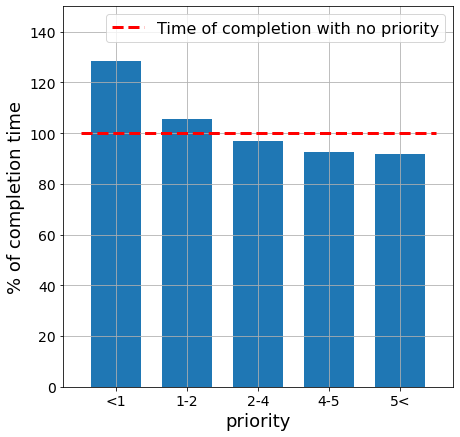

In [164]:
avg_time = time_data.iloc[5][0]
fig, ax = plt.subplots(figsize=(7,7))
plt.bar( ['<1','1-2','2-4','4-5','5<'],(time_data.iloc[5][1:8])*100/avg_time,width=0.7)
plt.xlabel('priority', fontsize=18)
plt.ylabel('% of completion time', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 150)
#plt.xlim(0,4)
plt.plot([-0.5,4.5],[avg_time*100/avg_time, avg_time*100/avg_time], linestyle='dashed', color='red', label='Time of completion with no priority', linewidth=3)
#plt.title('n = 24')
plt.legend(fontsize="16")
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/time_bar.eps', format='eps')

In [165]:
#reset()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


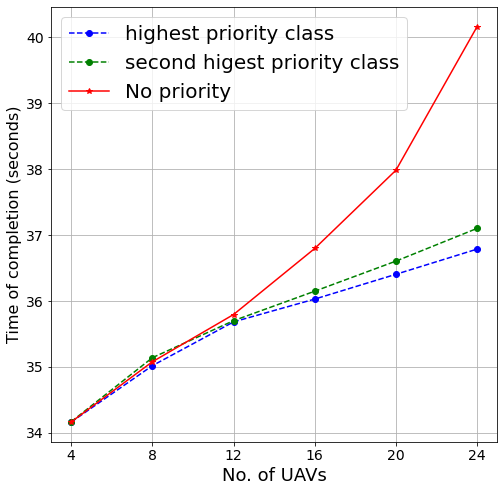

In [166]:
plt.figure(figsize=(8,8))


plt.plot([4,8,12,16,20,24],time_data['time 4'][:6], linestyle='--', marker='o', color='blue', label='highest priority class')
plt.plot([4,8,12,16,20,24],time_data['time 3'][:6], linestyle='--', marker='o', color='green', label='second higest priority class')
#plt.plot([4,8,12,16,20,24],time_data['time 2'][:6], linestyle='--', marker='o', color='pink', label='2 < p < 4')
#plt.plot([4,8,12,16,20,24],time_data['time 1'][:6], linestyle='--', marker='o', color='orange', label='1 < p < 2')
plt.plot([4,8,12,16,20,24],time_data['time w/o p'][:6], linestyle='-', marker='*', color='red', label='No priority')

plt.xticks([4,8,12,16,20,24], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize="20")
plt.xlabel('No. of UAVs', fontsize=18)
plt.ylabel('Time of completion (seconds)', fontsize=16)
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/time_top_2.eps', format='eps')


In [167]:
space_data

,space w/o p,space 0,space 1,space 2,space 3,space 4
0,10.375820,10.534822,10.410884,10.380548,10.302012,10.268028
1,8.915071,9.493752,9.141487,8.975963,8.701778,9.204849
2,7.997934,8.491035,8.451266,8.308227,8.180190,8.058163
3,7.540923,7.566398,7.843866,7.937354,7.942837,7.978620
4,7.134487,7.682470,7.762671,7.628807,7.739251,8.083141
5,6.803383,7.522469,7.459135,7.515671,7.446154,7.949425
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [168]:
space_data.iloc[5][2:]

space 1    7.459135
space 2    7.515671
space 3    7.446154
space 4    7.949425
Name: 5, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


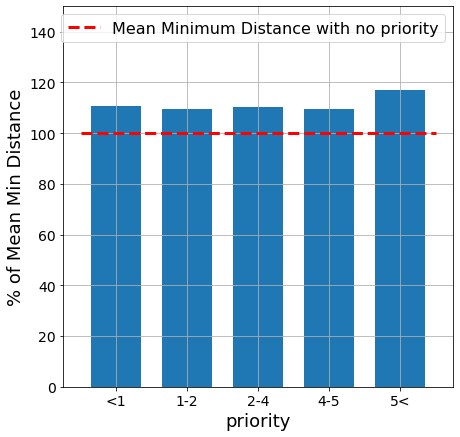

In [169]:
avg_space = space_data.iloc[5][0]
fig, ax = plt.subplots(figsize=(7,7))
plt.bar( ['<1','1-2','2-4','4-5','5<'],(space_data.iloc[5][1:]-0)*100/avg_space,width=0.7)
plt.xlabel('priority', fontsize=18)
plt.ylabel('% of Mean Min Distance', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,150)
plt.plot([-0.5,4.5],[space_data.iloc[5][0]*100/avg_space, space_data.iloc[5][0]*100/avg_space], linestyle='dashed', color='red', label='Mean Minimum Distance with no priority', linewidth=3)
plt.legend(fontsize="16")
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/space_bar.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


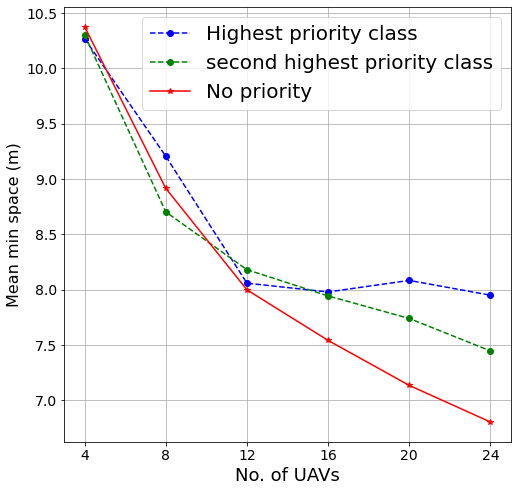

In [170]:
plt.figure(figsize=(8,8))


plt.plot([4,8,12,16,20,24],space_data['space 4'][:6], linestyle='--', marker='o', color='blue', label='Highest priority class')
plt.plot([4,8,12,16,20,24],space_data['space 3'][:6], linestyle='--', marker='o', color='green', label='second highest priority class')
#plt.plot([4,8,12,16,20,24],space_data['space 2'][:6], linestyle='--', marker='o', color='pink', label='2 < p < 4')
#plt.plot([4,8,12,16,20,24],space_data['space 1'][:6], linestyle='--', marker='o', color='orange', label='1 < p < 2')
plt.plot([4,8,12,16,20,24],space_data['space w/o p'][:6], linestyle='-', marker='*', color='red', label='No priority')

plt.xticks([4,8,12,16,20,24], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize="20")
plt.xlabel('No. of UAVs', fontsize=18)
plt.ylabel('Mean min space (m)', fontsize=16)
plt.grid()
plt.savefig('/media/storage/Agam/pca/plots/comparison plots/space_top_2.eps', format='eps')

In [171]:
#reset()